In [15]:
from netCDF4 import Dataset as NetCDFFile # extract the nc4 file to get geography data
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma

import os
#search for specific base file: find `conda info --base` -name epsg
os.environ["PROJ_LIB"] ='/opt/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj/'
from mpl_toolkits.basemap import Basemap #ploting the US map; install by `conda install -c anaconda basemap`

geography_file = NetCDFFile("GRACEDADM_CLSM0125US_7D.A20210628.030.nc4")

ds = NetCDFFile.Dataset(geography_file)

ds

AttributeError: type object 'netCDF4._netCDF4.Dataset' has no attribute 'Dataset'

dict_keys(['lat', 'lon', 'time', 'gws_inst', 'rtzsm_inst', 'sfsm_inst'])


In [2]:
lat = geography_file.variables['lat'][:]
lon = geography_file.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
time = geography_file.variables['time'][:]
gws_inst = geography_file.variables['gws_inst'][:] # Groundwater Percentile
rtzsm_inst = geography_file.variables["rtzsm_inst"][:] # Root Zone Soil Moisture Percentile
sfsm_inst = geography_file.variables["sfsm_inst"][:] #Surface Soil Moisture Percentile

#gws = ma.masked_values(gws_inst, -999)

In [3]:
geography_file.variables['time'][:] 

masked_array(data=[7029.],
             mask=False,
       fill_value=1e+20)

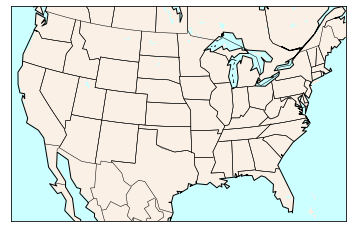

In [4]:
# mask out any missing values (-99)

#Zm = ma.masked_where(np.isnan(Z),Z)
#plt.pcolormesh(X,Y,Zm.T)

#Zm = ma.array(Z,mask=np.isnan(Z))

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
#map.drawcounties() # you can even add counties (and other shapefiles!)

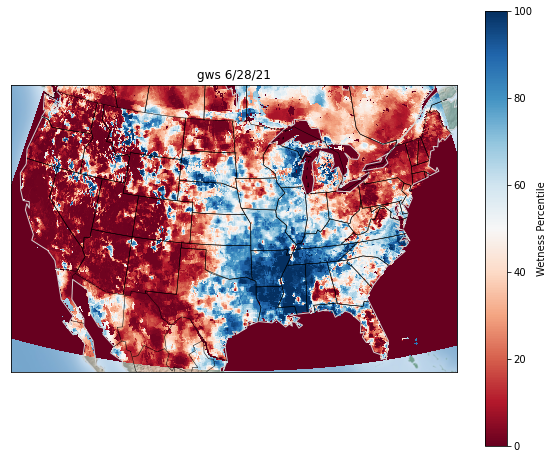

In [5]:
fig = plt.figure(figsize=(10, 8))
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map.shadedrelief(scale=0.5)
#map.pcolormesh(lon, lat, rtzsm_inst, latlon=True, cmap='RdBu_r')

map.pcolormesh(lon, lat, gws_inst.data[0], latlon=True, vmin=0.0,vmax=0.5, cmap='RdBu', )
plt.clim(0, 100); map.drawcoastlines(color='lightgray'); map.drawstates(); map.drawcountries(); plt.title('gws 6/28/21');
plt.colorbar(label='Wetness Percentile')

In [6]:
#lons,lats= np.meshgrid(lon-180,lat) # for this dataset, longitude is 0 through 360, so you need to subtract 180 to properly display on map
#x,y = map(lons,lats)

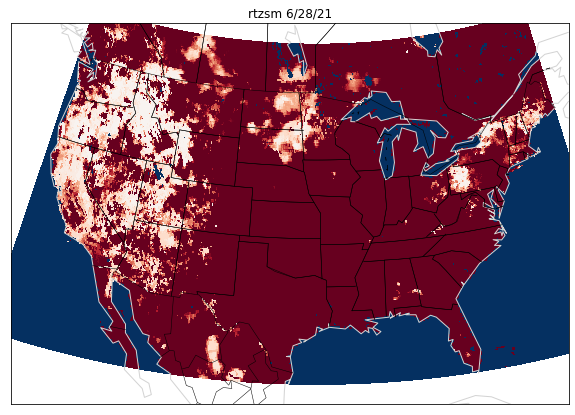

In [7]:
fig = plt.figure(figsize=(10, 8))
map = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
#map.shadedrelief(scale=0.5) #map.pcolormesh(lon, lat, rtzsm_inst, latlon=True, cmap='RdBu_r')
map.pcolormesh(lon, lat, rtzsm_inst.data[0], latlon=True, cmap='RdBu_r')
plt.clim(-8, 8); map.drawcoastlines(color='lightgray'); map.drawstates(); map.drawcountries(); plt.title('rtzsm 6/28/21');
#plt.colorbar(label='Wetness Percentile')

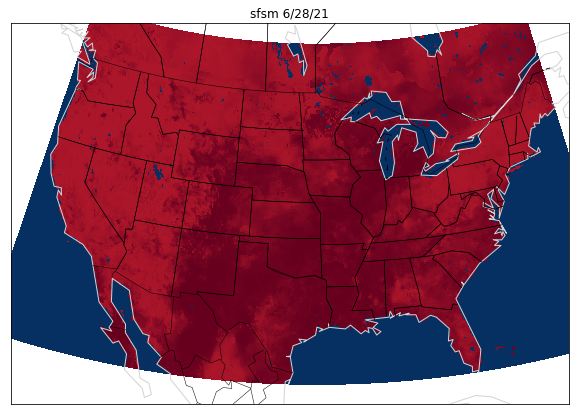

In [8]:
fig = plt.figure(figsize=(10, 8))
map = Basemap(llcrnrlon=-121,llcrnrlat=20,urcrnrlon=-62,urcrnrlat=51,
    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
#map.shadedrelief(scale=0.5)
#map.pcolormesh(lon, lat, rtzsm_inst, latlon=True, cmap='RdBu_r')
map.pcolormesh(lon, lat, sfsm_inst.data[0], latlon=True, cmap='RdBu_r')
#plt.clim(-8, 8)
map.drawcoastlines(color='lightgray'); map.drawstates(); map.drawcountries(); plt.title('sfsm 6/28/21');
#plt.colorbar(label='Wetness Percentile')

In [9]:
# try the code with a different map